In [ ]:
from matplotlib import pyplot as plt

import random
random.seed(42)

import torch
from torch.nn import functional as F
torch.manual_seed(42)

from model import NGram

import sys
sys.path.insert(0, "..")
from preprocessing import get_data, load_split_data

%matplotlib inline

## Load Data


In [ ]:
block_size = 3
words, stoi, itos = get_data()
Xtr, Ytr, Xdev, Ydev, Xte, Yte = load_split_data(words, stoi, block_size)

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
def cross_entropy(logits, Y):
    logits = (
        logits - logits.max(1, keepdim=True).values
    )  # so exp doesn't overflow 2 inf
    counts = logits.exp()
    prob = counts / counts.sum(1, keepdim=True)
    loss = -prob[torch.arange(len(logits)), Y].log().mean()
    return loss

## Best LR


no.of paramters: 3481
0.15037551522254944


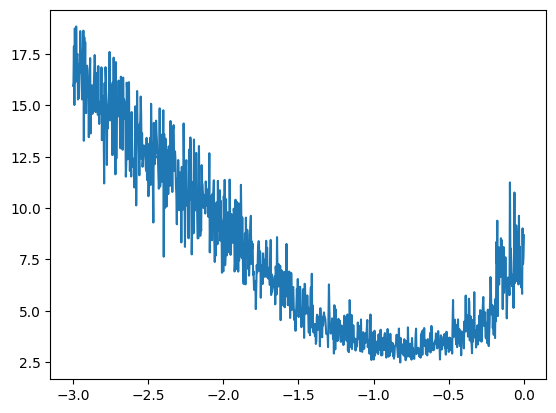

In [ ]:
batch_size = 32
n_iters = 1_000
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
losses = []
m = NGram()

for i in range(n_iters):
    # mini-batch
    ix = torch.randint(0, len(Xtr), (batch_size,))
    logits = m.forward(Xtr[ix])

    loss = cross_entropy(logits, Ytr[ix])
    losses.append(loss.item())

    for p in m.parameters:
        p.grad = None

    loss.backward()

    for p in m.parameters:
        p.data += -lrs[i] * p.grad

print(lrs[torch.argmin(torch.tensor(losses))].item())
plt.plot(lre, losses)

## Train


In [ ]:
batch_size = 32
n_iters = 10_000
lr = 0.1

m = NGram()
losses = []

no.of paramters: 3481


16.49485206604004
2.6480653285980225
2.6395368576049805
2.7798662185668945
2.2651777267456055
2.670337200164795
2.6570911407470703
2.4482147693634033
2.249065637588501
2.6094863414764404


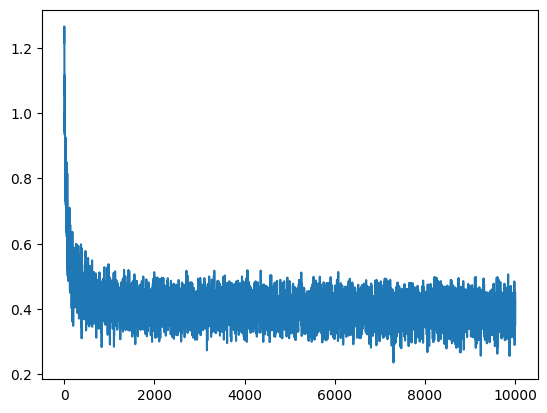

In [ ]:
for i in range(n_iters):
    # mini-batch
    ix = torch.randint(0, len(Xtr), (batch_size,))
    logits = m.forward(Xtr[ix])

    loss = cross_entropy(logits, Ytr[ix])
    losses.append(loss.log10().item())  # mini-batch loss

    if i % 1_000 == 0:
        print(loss.item())

    for p in m.parameters:
        p.grad = None

    loss.backward()

    for p in m.parameters:
        p.data += -lr * p.grad

plt.plot(range(len(losses)), losses)

### Total loss


In [ ]:
logits = m.forward(Xtr)
loss = cross_entropy(logits, Ytr)
loss

tensor(2.4480, grad_fn=<NegBackward0>)

In [ ]:
logits = m.forward(Xdev)
loss = cross_entropy(logits, Ydev)
loss

tensor(2.4489, grad_fn=<NegBackward0>)

In [ ]:
def predict(n=10):
    for i in range(n):
        out = []
        context = [0] * 3
        while True:
            logits = m.forward(context)
            probs = F.softmax(logits, 1)
            ix = torch.multinomial(probs, num_samples=1).item()
            context = context[1:] + [ix]
            out.append(itos[ix])
            if ix == 0:
                break
        print("".join(out))


predict()

zalolian.
jennencen.
manya.
serylesarilliesosetavii.
nyty.
vella.
kae.
amergheli.
eevlik.
oiv.
